<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/%20Week-11-ml-classification-cluster%20/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
titanic = sns.load_dataset('titanic')
titanic_dummy = titanic.copy()

In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**We are going to learn machine learning concepts with the titanic dataset, one of the most infamous shipwrecks in history.** 

Also as a fun fact, this dataset is one of the most famous datasets around in terms of machine learning next to the MNIST and Iris dataset!

# Data preprocessing


Machine learning is nothing without fine data preprocessing.  
Excute the code below that modifies the titanic dataset by:

* Selecting dedicated and useful features (i.e columns)
* Removing rows with NaN data
* Use `factorize` to recode features `sex` (gender) and `embark_town` (the harbour city) into numerical data, because ML needs (and loves) numerical data.

In [ ]:
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'embark_town']]
#titanic.head()
#titanic.dtypes
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
embark_town      2
dtype: int64

In [ ]:
titanic.dropna(inplace=True)
titanic['sex'] = titanic['sex'].factorize()[0]
titanic['embark_town'] = titanic['embark_town'].factorize()[0]

In [ ]:
titanic.head()
titanic.embark_town.value_counts(dropna=False)

0    554
1    130
2     28
Name: embark_town, dtype: int64

# KNN classification with Scikit-Learn

## Train Test Split Data


First you have to divide the titanic dataframe into 2 separated dataframes :
  - `y` with the feature to be predicted (i.e. survived)
  - `X` with the other features that will be used for the model (all numeric features + sex recoded with factorize + embark_town recoded with factorize)

And then from `X` and `y`, you need to separate them for training and testing your model :
* Use 75% of data for training, the rest for testing
* Please split data with `random_state = 36`

[See the previous quest on train-test split if needed](https://odyssey.wildcodeschool.com/quests/581)

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split
y = titanic['survived']
X = titanic.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, test_size=0.25)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 712
The length of the train dataset is   : 534
The length of the test dataset is    : 178


## Model initialization

CONGRATS !!! You are going to develop your first ML model for KNN classification.  
For that, please create a `model` object that initialises your model with the KNN classifier


[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Your code here
model = KNeighborsClassifier()

## Model fitting


Now you have to fit your model on the training data.

[More info here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Make predictions

You model is ready for prediction !

In [ ]:
# Your code here
predictions = model.predict(X_test)
print(predictions)

[0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


Make prediction for yourself !  
Fill the data below and evaluate your chance of survival ...

In [ ]:
titanic.head()

,survived,pclass,sex,age,embark_town
0,0,3,0,22.0,0
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,0
4,0,3,0,35.0,0


In [ ]:
# Your code here
my_class = 0
my_sex = 0 
my_age = 60
my_town = 1
my_data = np.array([my_class, my_sex, my_age, my_town]).reshape(1,4)
model.predict(my_data)

array([0])

## Model evaluation

Last but not least, you should evaluate the accuracy of your model.  
The metric `accuracy_score` is directly imported form `sklearn.metrics `.  
Please remember than other metrics are available to evaluate classification models such as precision, recall, f1 score and all together compose the `confusion matrix`.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

accuracy = 0.736


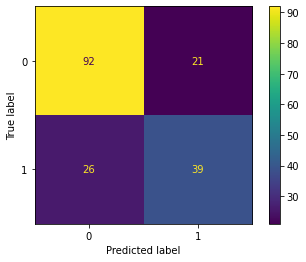

In [ ]:
y_true = list(y_test)
y_pred = list(predictions)

accuracy = accuracy_score(y_test, predictions)
confusion_matrix = confusion_matrix(y_true, y_pred)

print("accuracy = %.3f" % accuracy)
#dont know why, but doesnt want to disply correctly
#print("Confusion matrix:\n", confusion_matrix)
plot_confusion_matrix(model, X_test, y_test)

Performances of our model are pretty poor and could be explained by the original dataset.  
Antoher way is to tune the hyperparameter such as the number of neighbors ...

## Hyperparameter


Let's play with the `n_neighbors` and `weight` hyperparameters of the model.  
* Evaluate the score of your models by adjusting the hyperparameter from 2 to 10.
* What is the values of `n_neighbors` and `weight` that leads to the best score ?

In [ ]:
weights = ["uniform", "distance"]

def find_best_neighbors(weight=weights[1], X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
  for n in range(2,11):
    model = KNeighborsClassifier(n_neighbors=n, weights=weight)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"neighbors = {n} accuracy = {round(accuracy_score(y_test, preds),3)}, weight = {weight}")

find_best_neighbors(weight=weights[0])
print()
find_best_neighbors(weight=weights[1])

neighbors = 2 accuracy = 0.753, weight = uniform
neighbors = 3 accuracy = 0.73, weight = uniform
neighbors = 4 accuracy = 0.736, weight = uniform
neighbors = 5 accuracy = 0.736, weight = uniform
neighbors = 6 accuracy = 0.758, weight = uniform
neighbors = 7 accuracy = 0.747, weight = uniform
neighbors = 8 accuracy = 0.77, weight = uniform
neighbors = 9 accuracy = 0.736, weight = uniform
neighbors = 10 accuracy = 0.725, weight = uniform

neighbors = 2 accuracy = 0.781, weight = distance
neighbors = 3 accuracy = 0.764, weight = distance
neighbors = 4 accuracy = 0.764, weight = distance
neighbors = 5 accuracy = 0.753, weight = distance
neighbors = 6 accuracy = 0.775, weight = distance
neighbors = 7 accuracy = 0.77, weight = distance
neighbors = 8 accuracy = 0.775, weight = distance
neighbors = 9 accuracy = 0.77, weight = distance
neighbors = 10 accuracy = 0.77, weight = distance


# Let's go back to data processing to improve our model

Please do the same data processing as previously, but change `embark_town` (the harbour city) with get_dummies (and not factorize).
Then initialize, fit and score your model. Is it better?

In [ ]:
titanic_dummy = titanic_dummy[['survived', 'pclass', 'sex', 'age', 'embark_town']]
titanic_dummy.dropna(inplace=True)
titanic_dummy = pd.get_dummies(data=titanic_dummy, columns=['sex'], prefix='sex')
titanic_dummy = pd.get_dummies(data=titanic_dummy, columns=['embark_town'], prefix='embark_town')
titanic_dummy.head()

,survived,pclass,age,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,1,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,1,0,0,1


In [ ]:
y_dummy = titanic_dummy['survived']
X_dummy = titanic_dummy.drop('survived', axis=1)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_dummy, y_dummy, random_state = 36, test_size=0.25)
Xd_train.shape, X_train.shape

((534, 7), (534, 4))

In [ ]:
find_best_neighbors(weight=weights[0], X_train=Xd_train, X_test=Xd_test, y_train=yd_train, y_test=yd_test)
print()
find_best_neighbors(weight=weights[1], X_train=Xd_train, X_test=Xd_test, y_train=yd_train, y_test=yd_test)

neighbors = 2 accuracy = 0.781, weight = uniform
neighbors = 3 accuracy = 0.77, weight = uniform
neighbors = 4 accuracy = 0.781, weight = uniform
neighbors = 5 accuracy = 0.77, weight = uniform
neighbors = 6 accuracy = 0.803, weight = uniform
neighbors = 7 accuracy = 0.803, weight = uniform
neighbors = 8 accuracy = 0.787, weight = uniform
neighbors = 9 accuracy = 0.758, weight = uniform
neighbors = 10 accuracy = 0.775, weight = uniform

neighbors = 2 accuracy = 0.809, weight = distance
neighbors = 3 accuracy = 0.803, weight = distance
neighbors = 4 accuracy = 0.798, weight = distance
neighbors = 5 accuracy = 0.792, weight = distance
neighbors = 6 accuracy = 0.809, weight = distance
neighbors = 7 accuracy = 0.809, weight = distance
neighbors = 8 accuracy = 0.809, weight = distance
neighbors = 9 accuracy = 0.787, weight = distance
neighbors = 10 accuracy = 0.798, weight = distance


#dummies are smarter :)

# Conclusions
* Congrats !!! You just landed on the MACHINE LEARNING planet
* The KNN classifier is an algorithm from supervised learning part of ML
* Scikit learn is the to-know-and-to-love toolbox for ML
* Our KNN classifier could be improved with hyperparameter tuning
* Other algorithms should be tested for selecting the best one, but it is another story ... to be continued ML Data Wilders :) 